# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os,shutil, pickle
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
dir = 'data'
if not os.path.exists(dir):
    os.makedirs(dir)
    file_name = './data/data.zip'
    data_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip'
    request.urlretrieve(data_url, file_name)
    shutil.unpack_archive(file_name, 'data')


training_file = dir + '/train.p'
testing_file = dir + '/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
n_train = len(X_train)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

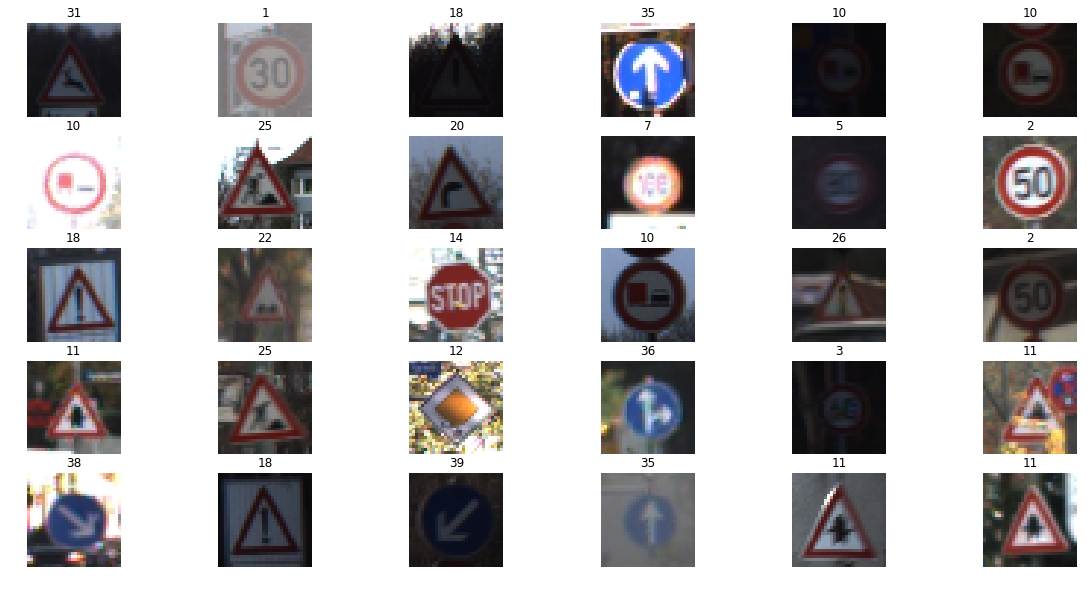

In [4]:
samples = random.sample(range(n_train), 30)
_, axes = plt.subplots(5,6,figsize=(20,10))
for j in range(5):
    for i in range(6):
        axes[j,i].axis('off')
        img_i = i + j*6
        axes[j,i].imshow(X_train[samples[img_i]])
        axes[j,i].set_title(str(y_train[samples[img_i]]))

### Plot histogram
plot the histogram to find if the examples in each class are balanced.


[]

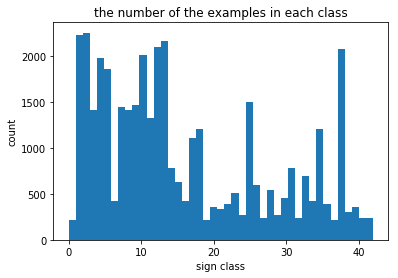

In [5]:
plt.hist(y_train, bins=n_classes)
plt.title('the number of the examples in each class')
plt.xlabel('sign class')
plt.ylabel('count')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The shape matters more than the color in the traffic signs. Also the samples have different intensity range, normalization should produce a unified intensity range.

### convert to grayscale and normalize

In [4]:
def convert_img(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    X = (X - np.mean(X)) / (np.max(X) - np.min(X))
    return X

X_train = convert_img(X_train)
X_test = convert_img(X_test)

X_train.shape


(39209, 32, 32)

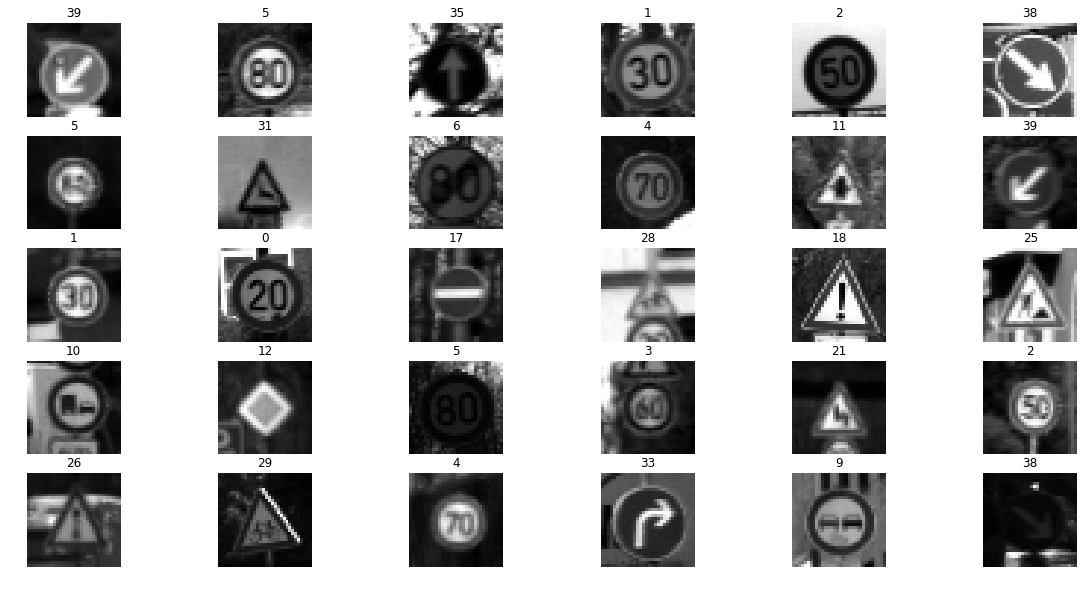

In [7]:
samples = random.sample(range(n_train), 30)
_, axes = plt.subplots(5,6,figsize=(20,10))
for j in range(5):
    for i in range(6):
        axes[j,i].axis('off')
        img_i = i + j*6
        axes[j,i].imshow(X_train[samples[img_i]], cmap='gray')
        axes[j,i].set_title(str(y_train[samples[img_i]]))

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

* I use the original testing data.
* The traing / validation data ratio is 9:1.
* The raw dataset has unbalanced classes. I resample in each class evenly so that each class has so many samples as the one with the most numbers.


In [5]:
y_count = np.unique(y_train, return_counts=True)
max_y_count = np.max(y_count[1])
balanced_x = np.empty([0,32,32])
balanced_y = np.empty([0])
for y, count in zip(y_count[0], y_count[1]):
    count_diff = max_y_count - count
    subset_x = X_train[y_train == y]
  
    balanced_x = np.vstack([balanced_x, subset_x])
    redundant_x = subset_x[np.random.randint(0, count, size=count_diff)]
    balanced_x = np.vstack([balanced_x, redundant_x])
    
    subset_y = np.zeros([max_y_count])
    subset_y[:] = y
    balanced_y = np.append(balanced_y, subset_y)

X_train = balanced_x
y_train = balanced_y


In [6]:
# convert to tensorflow input
X_train = X_train[..., None]
X_test = X_test[..., None]

[]

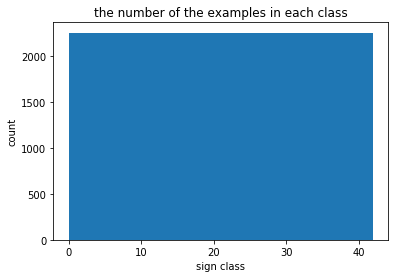

In [10]:
plt.hist(y_train, bins=n_classes)
plt.title('the number of the examples in each class')
plt.xlabel('sign class')
plt.ylabel('count')
plt.plot()

** Split the testing dateset into train and validation **

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, y_train = shuffle(X_train, y_train)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


** Answer: **

My final architecture is a straight forward 4-layer stacked CNN. 

|Type|Size|Pooling|
-|-|-|-
Layer1|3x3 Conv|80|Max Pooling 2x2 stride 2
Layer2|2x2 Conv|150|Max Pooling 2x2 stride 2
Layer3|2x2 Conv|256|Max Pooling 2x2 stride 2
Layer4|2x2 Conv|256|No Pooling
Layer5|Full connection|512| -
Layer4|Full connection|43| -


In [8]:
def logits(x, keep):    
    mu = 0
    sigma = 0.1
    
    # out 30x30
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 80), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(80))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep)
    # out 15x15
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # out 13x13
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 80, 150), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(150))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep)
    # out 7x7
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # out 6x6
    conv3_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 150, 256), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(256))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep)
    # out 3x3
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # out 2x2
    conv4_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 256, 256), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(256))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.dropout(conv4, keep)
    
    # Flatten.
    fc0 = tf.contrib.layers.flatten(conv4)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)    
    
    return fc2

In [9]:
EPOCHS = 200
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
learning_rate = tf.placeholder(tf.float32)
logits = logits(x, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += accuracy * len(batch_x)
        total_loss += loss * len(batch_x)
    return (total_accuracy / num_examples, total_loss / num_examples)

   
    

In [ ]:
saver = tf.train.Saver()

with tf.Session() as sess:
    
    if os.path.exists('./model.data-00000-of-00001'):
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        print ('restored')
    else:
        sess.run(tf.global_variables_initializer())

        
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        
        rate = 0.001 if i < 10 else 0.0004
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, 
                                                    y: batch_y, 
                                                    keep_prob: 0.5,
                                                    learning_rate: rate 
                                                   })
            
        validation_accuracy, loss_sample = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1), end='')
        print("Validation Accuracy = {:.3f}, Loss per sample = {:.3f}".format(validation_accuracy, loss_sample))

        if i > 0 and i % 10 == 0:
            saver.save(sess, './model')
            print('model saved')
    
    


Training...
EPOCH 1 ...Validation Accuracy = 0.279, Loss per sample = 3.423
EPOCH 2 ...Validation Accuracy = 0.842, Loss per sample = 0.957
EPOCH 3 ...Validation Accuracy = 0.955, Loss per sample = 0.396
EPOCH 4 ...Validation Accuracy = 0.978, Loss per sample = 0.193
EPOCH 5 ...Validation Accuracy = 0.985, Loss per sample = 0.132
EPOCH 6 ...Validation Accuracy = 0.984, Loss per sample = 0.103
EPOCH 7 ...Validation Accuracy = 0.992, Loss per sample = 0.075
EPOCH 8 ...Validation Accuracy = 0.991, Loss per sample = 0.058
EPOCH 9 ...Validation Accuracy = 0.990, Loss per sample = 0.059
EPOCH 10 ...Validation Accuracy = 0.994, Loss per sample = 0.038
EPOCH 11 ...Validation Accuracy = 0.996, Loss per sample = 0.031
model saved
EPOCH 12 ...Validation Accuracy = 0.998, Loss per sample = 0.020
EPOCH 13 ...Validation Accuracy = 0.998, Loss per sample = 0.020
EPOCH 14 ...Validation Accuracy = 0.996, Loss per sample = 0.019
EPOCH 15 ...Validation Accuracy = 0.996, Loss per sample = 0.020
EPOCH 16 .

In [10]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.966


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- Optimizer: AdamOptimizer 
- Batch size: 128
- Epochs: set to 200
- Dropout with keep rate of 0.5
- Learning rate: 1e-3 => 4e-4
- Dropout rate: 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I tried the LeNet at first. The problem with the LeNet is easy to overfit since it uses so many neurons in the 3 FC layers.
I tweaked the LeNet serveral times with different parameters. It seemed to perform better with more convolution layers. The  traffic sign images have increasing complexity despite same size as MNIST dataset, therefore I used small kenel and much more filters. Finally I got the architecture with 4 conv layers and 2 FC layers.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

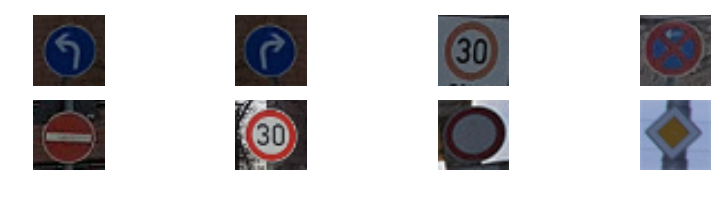

In [159]:
from pandas.io.parsers import read_csv


signs = read_csv("signnames.csv").values[:, 1]
img_dir = './data/extras/'
img_files = [ img_dir + f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
test_img_data = np.empty([0, 32, 32, 3], dtype='uint8')
for img_file in img_files:
    img_array = plt.imread(img_file)
    
    test_img_data = np.vstack([test_img_data, img_array[None, ...]])

_, axes = plt.subplots(2,4,figsize=(10,2))
for j in range(2):
    for i in range(4):
        img_i = i + j*4
        axes[j,i].axis('off')
        axes[j,i].imshow(test_img_data[img_i])


In [160]:
test_img_data = convert_img(test_img_data)
test_img_data = test_img_data[..., None]
processed_test_img = test_img_data.squeeze(axis=3)

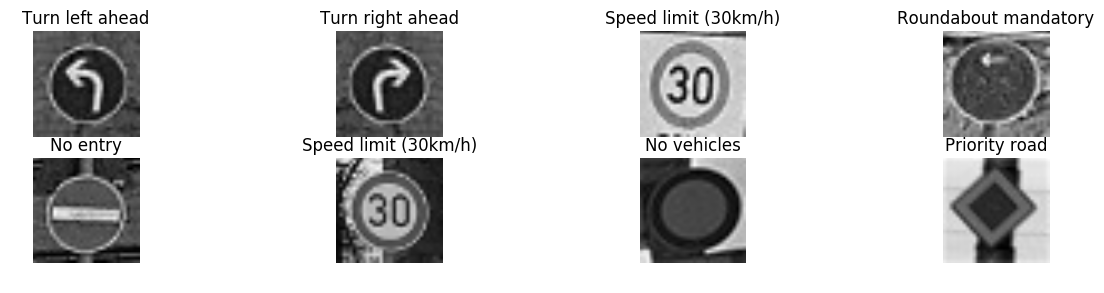

In [162]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_pred = tf.nn.softmax(logits)
    test_pred = sess.run(softmax_pred, feed_dict={x: test_img_data, keep_prob: 1})
    prediction_test = np.argmax(test_pred, 1)
    _, axes = plt.subplots(2,4,figsize=(15,3))
    
    for j in range(2):
        for i in range(4):
            img_i = i + j*4
            axes[j,i].axis('off')
            axes[j,i].imshow(processed_test_img[img_i],cmap='gray')
            axes[j,i].set_title(signs[prediction_test[img_i]])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [163]:
processed_test_img.shape[0]

8

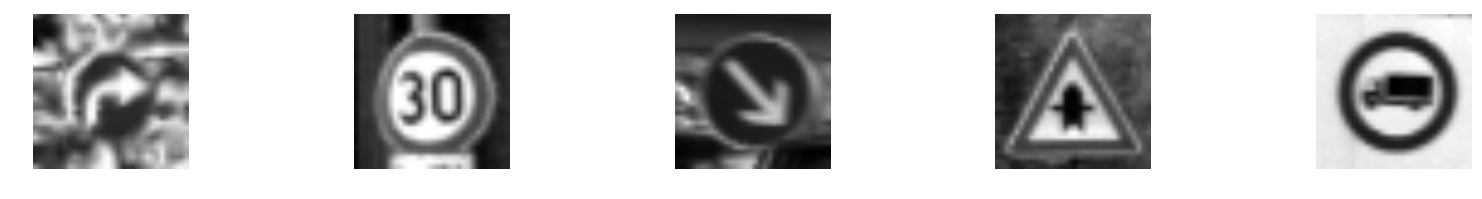

In [164]:
samples = random.sample(range(processed_test_img.shape[0]), 5)
_, axes = plt.subplots(1,5,figsize=(20,2))
for i in range(5):
    axes[i].axis('off')
    img = (X_test[samples[i]]).squeeze(axis=2)
    axes[i].imshow(img,cmap='gray')


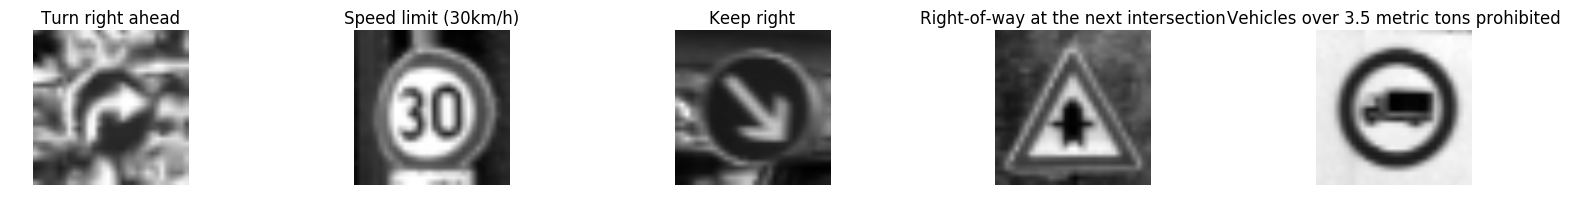

In [165]:
sample_test_set = np.stack(X_test[samples,...])
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_pred = tf.nn.softmax(logits)
    test_pred = sess.run(softmax_pred, feed_dict={x: sample_test_set, keep_prob: 1})
    prediction_test = np.argmax(test_pred, 1)
    
    _, axes = plt.subplots(1,5,figsize=(20,2))
    for i in range(5):
        axes[i].axis('off')
        img = (X_test[samples[i]]).squeeze(axis=2)
        axes[i].imshow(img,cmap='gray')
        axes[i].set_title(signs[prediction_test[i]])


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [166]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_pred = tf.nn.softmax(logits)
    test_pred = sess.run(softmax_pred, feed_dict={x: sample_test_set, keep_prob: 1})
    prediction_test = np.argmax(test_pred, 1)
    print(prediction_test)

[33  1 38 11 16]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.